In [1]:
# Analyze microplate readings from a 96 well plate 
# Half plate covered by commercial membrane, other half by PDMS
# 2nd to bottom row - only DI water
# bottom row - Air


In [2]:
import csv;
import numpy as np; 
import matplotlib.pyplot as plt; 
import pylab; 
import os; 
import plotly.plotly as py;
import plotly.tools as tls
from statsmodels import robust
import seaborn as sns; # Seaborn box plot for statistical annotation - * pvalue


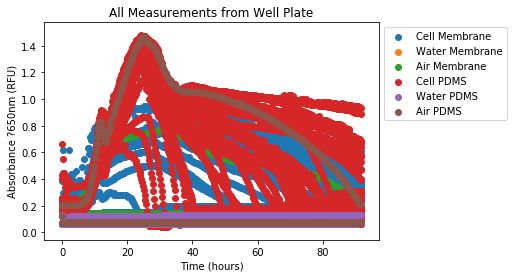

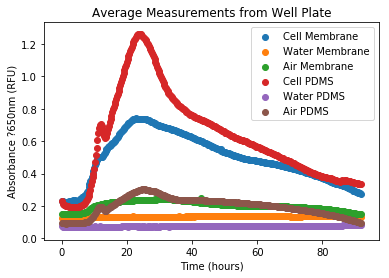

In [3]:
filename = "test_20181109_02"
filepath = os.path.join("Data", filename + ".csv")

time = []; temperature = []; data_membrane = []; data_pdms = []; 

file=open( filepath, "r")
reader = csv.reader(file)
for line in reader:
    temperature.append(line[1])
    data_membrane.append(line[2:8])
    data_pdms.append(line[8:14])
    
  
def build_list(list, variable, analysis_type):
    float_list = [];
    for i in range(len(list)):
        a = list[i]
        for i in range(len(a)):       
            if (len(a[i])) > 1:
                b = float(a[i])
                float_list.append(b)
    
    cell = []; water = []; air = []; 
    cell_time = []; water_time = []; air_time = []; 
    c = []; w = []; a = [];
    cell_average = []; water_average = []; air_average = [];
    c_t = []; w_t = []; a_t = [];
    
    j = 0; time = 0;
    for i in range(len(float_list)): 
        
        reading = float_list[i];
            
        if j < 36: cell.append(reading); cell_time.append(time); c.append(reading);    
        elif j >= 36 and j <42: water.append(reading); water_time.append(time); w.append(reading);  
        else: air.append(reading); air_time.append(time); a.append(reading);
            
        if i%48 == 0 and i>0: 
            j = 0; time = i/48*15/60;    
            mean = sum(c)/len(c); cell_average.append(mean); c_t.append(time); c = [];
            mean = sum(w)/len(w); water_average.append(mean); w_t.append(time); w = [];
            mean = sum(a)/len(a); air_average.append(mean); a_t.append(time); a = [];
        else: j=j+1;
    
    # Return the data 
    if variable == "Cell":
        if analysis_type == "All": return(cell, cell_time)
        else: return(cell_average, c_t)    
    elif variable == "Water":
        if analysis_type == "All": return(water, water_time)
        else: return(water_average, w_t)   
    elif variable == "Air":
        if analysis_type == "All": return(air, air_time)
        else: return(air_average, a_t)    
    else: return(1,1,1,1)
           

analysis_type = ["All","Average"];        
for j in range(len(analysis_type)):
    
    data = [data_membrane, data_pdms]; data_for_legend = ["Membrane", "PDMS"]
    for k in range(len(data)):
    
        variable = ["Cell","Water","Air"]; 
        for i in range(len(variable)):
            group_data, group_time = build_list(data[k], variable[i], analysis_type[j]);
            label_name = variable[i] + " " + data_for_legend[k]
            plt.scatter(group_time,group_data, label=label_name)

    plt.title(analysis_type[j] + " Measurements from Well Plate");
    plt.xlabel("Time (hours)");
    plt.ylabel("Absorbance ?650nm (RFU)");
    plt.title(analysis_type[j] + " Measurements from Well Plate");
    plt.legend(bbox_to_anchor=(1, 1));
    plt.show()

